<b> Objective : To get Happiness Rate and correlation between vaious Factors

In [7]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
#Pulling and reading the data from file
df=pd.read_csv('hap_report.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [9]:
# First 10 head count from the file
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


----

From the given data I will be dropping Rank, Country and region data from the table as its not useful for overall prediction because in new set of data we might get new rank , country or region. Hence, we will focus more on Numeric data column values for better prediction.

In [11]:
df.drop(['Country','Region','Happiness Rank'],axis=1,inplace=True )

In [12]:
df.head(10)

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


<b> Visualisation of Data 

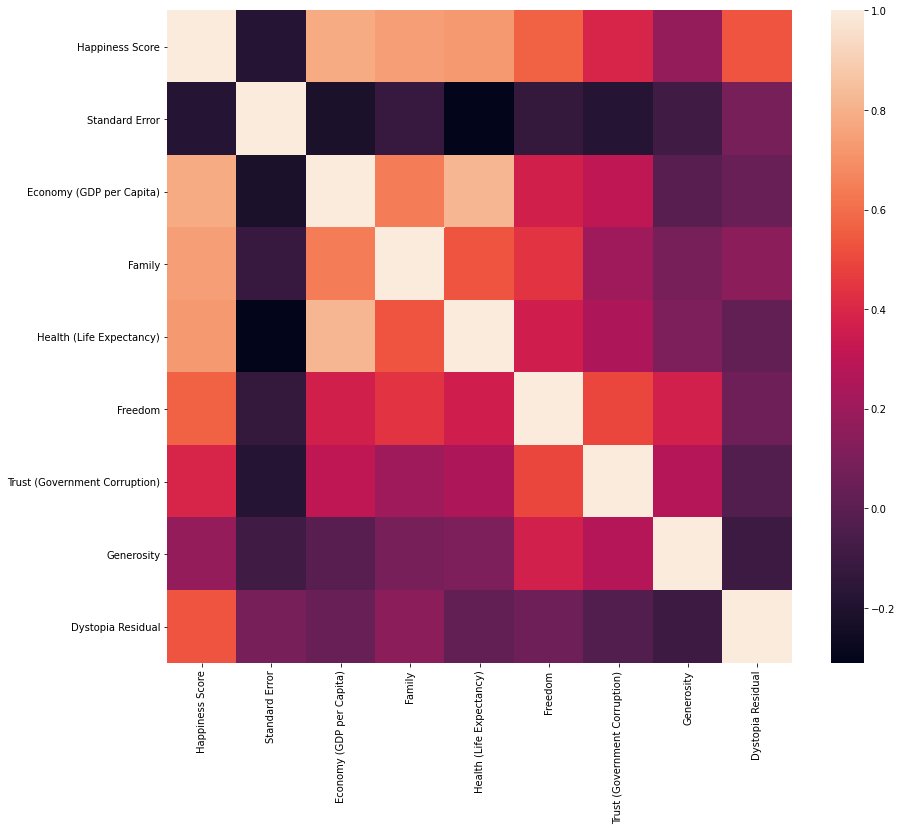

In [42]:
#Visualisation using seaborn and matplotlib to understand the column correlation
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr())
plt.show()

Here Happiness Score is mostly correlated to GDP , Family and Health and least correlated to Governmnent and
Generosity

---

<b> Preprocessing

In [14]:
#checking missing Values
df.isnull().sum()
# Clean dataset with no null Value

Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [15]:
df.dtypes

Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [16]:
# Scaling
y=df['Happiness Score']
x=df.drop('Happiness Score',axis=1)

In [17]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [18]:
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


<b> Linear Regression Model

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [24]:
# Scaling x-axis because its the value on which value of y-axis (happiness score) depends
scaler = MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.131954,0.826132,0.962403,0.918244,0.993789,0.760595,0.372895,0.668630
1,0.256311,0.770412,1.000000,0.924496,0.938841,0.256292,0.548198,0.725030
2,0.124947,0.784113,0.970297,0.853099,0.969615,0.876175,0.428947,0.660889
3,0.171549,0.863099,0.949167,0.863409,1.000000,0.661394,0.435983,0.652724
4,0.143943,0.784592,0.943219,0.883326,0.945112,0.597144,0.575602,0.648584
...,...,...,...,...,...,...,...,...
153,0.136429,0.131376,0.551764,0.418083,0.883953,1.000000,0.284314,0.104425
154,0.152638,0.169573,0.252355,0.311241,0.723426,0.145132,0.229432,0.398557
155,0.267370,0.392329,0.338668,0.704150,0.234184,0.342556,0.592790,0.000000
156,0.574926,0.009051,0.296578,0.218444,0.176937,0.182312,0.247864,0.459573


In [29]:
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.7)

In [30]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
print (model.score(X_test,y_test))

0.9999999101071803
